In [1]:
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.model_selection import train_test_split

In [1]:
#Importing basic libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

In [4]:
#Preprocess data in nba2k-full dataset

In [5]:
WORKING_DIR1  = "C:/Users/ASUS/Documents/GitHub/R5D5-Project/model/DataPreprocess/Datasets/nba2k-main-data-sheet.csv"

In [6]:
df1 = pd.read_csv(WORKING_DIR1)

In [7]:
df1.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,TWITTER_FOLLOWER_COUNT_MILLIONS
0,Aaron Gordon,81,#0,Orlando Magic,F,9/16/1995,6-8 / 2.03,220 lbs. / 99.8 kg.,19863636,USA,2014,1,4,Arizona,NBA2k20,42.5,16.0,NaN
1,Aaron Holiday,73,#3,Indiana Pacers,G,9/30/1996,6-0 / 1.83,185 lbs. / 83.9 kg.,2239200,USA,2018,1,23,UCLA,NBA2k20,NaN,NaN,NaN
2,Abdel Nader,70,#11,Oklahoma City Thunder,F,9/25/1993,6-5 / 1.96,225 lbs. / 102.1 kg.,1618520,Egypt,2016,2,58,Iowa State,NBA2k20,NaN,NaN,NaN
3,Admiral Schofield,71,#1,Washington Wizards,F,3/30/1997,6-5 / 1.96,241 lbs. / 109.3 kg.,1000000,USA,2019,2,42,Tennessee,NBA2k20,NaN,NaN,NaN
4,Al Horford,85,#42,Philadelphia 76ers,C-F,6/3/1986,6-9 / 2.06,246 lbs. / 111.6 kg.,28000000,Dominican Republic,2007,1,3,Florida,NBA2k20,136.0,71.0,0.253


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   full_name                        464 non-null    object 
 1   rating                           464 non-null    int64  
 2   jersey                           464 non-null    object 
 3   team                             464 non-null    object 
 4   position                         464 non-null    object 
 5   b_day                            464 non-null    object 
 6   height                           464 non-null    object 
 7   weight                           464 non-null    object 
 8   salary                           464 non-null    int64  
 9   country                          464 non-null    object 
 10  draft_year                       464 non-null    int64  
 11  draft_round                      464 non-null    object 
 12  draft_peak            

In [9]:
# Drop the "college" column
df1.drop("college", axis=1, inplace=True)

# Drop the "version" column
df1.drop("version", axis=1, inplace=True)

In [10]:
# fill the missing values in columns (TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT)
df1['TWITTER_FAVORITE_COUNT'].fillna(df1['TWITTER_FAVORITE_COUNT'].mean(), inplace=True)
df1['TWITTER_RETWEET_COUNT'].fillna(df1['TWITTER_RETWEET_COUNT'].mean(), inplace=True)
df1['TWITTER_FOLLOWER_COUNT_MILLIONS'].fillna(df1['TWITTER_FOLLOWER_COUNT_MILLIONS'].mean(), inplace=True)

In [11]:
#convert columns to integers
features = ['draft_round','draft_peak']
df1[features] = df1[features].replace('Undrafted','0')
df1[features] = df1[features].astype(int)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   full_name                        464 non-null    object 
 1   rating                           464 non-null    int64  
 2   jersey                           464 non-null    object 
 3   team                             464 non-null    object 
 4   position                         464 non-null    object 
 5   b_day                            464 non-null    object 
 6   height                           464 non-null    object 
 7   weight                           464 non-null    object 
 8   salary                           464 non-null    int64  
 9   country                          464 non-null    object 
 10  draft_year                       464 non-null    int64  
 11  draft_round                      464 non-null    int32  
 12  draft_peak            

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   full_name                        464 non-null    object 
 1   rating                           464 non-null    int64  
 2   jersey                           464 non-null    object 
 3   team                             464 non-null    object 
 4   position                         464 non-null    object 
 5   b_day                            464 non-null    object 
 6   height                           464 non-null    object 
 7   weight                           464 non-null    object 
 8   salary                           464 non-null    int64  
 9   country                          464 non-null    object 
 10  draft_year                       464 non-null    int64  
 11  draft_round                      464 non-null    int32  
 12  draft_peak            

In [14]:
## Creating a copy of dataframe for feature enginnering

In [15]:
df1_copy = df1.copy()

# Removing the un-necessary data in the dataset(salary,height,weight)
df1_copy['height'] = df1_copy['height'].apply(lambda x: float(x.split('/')[1]))
df1_copy['weight'] = df1_copy['weight'].apply(lambda x: float(x.split('/')[1].split('kg')[0]))

In [16]:
# Creating new column for Experience
for index,value in enumerate(df1['draft_year']):
    df1_copy.loc[index,'Experience']= int( (datetime.datetime.today() - datetime.datetime.strptime(str(value),'%Y')).days / 365.25)

In [17]:
# Creating new column for Age
for index,value in enumerate(df1['b_day']):
    value = value.replace(" ", "")
    df1_copy.loc[index,'Age']= int( (datetime.datetime.today() - datetime.datetime.strptime(value,'%M/%d/%Y')).days / 365.25)

In [18]:
df1_copy.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,TWITTER_FOLLOWER_COUNT_MILLIONS,Experience,Age
0,Aaron Gordon,81,#0,Orlando Magic,F,9/16/1995,2.03,99.8,19863636,USA,2014,1,4,42.500000,16.000000,2.850071,9.0,28.0
1,Aaron Holiday,73,#3,Indiana Pacers,G,9/30/1996,1.83,83.9,2239200,USA,2018,1,23,583.257282,198.997573,2.850071,5.0,27.0
2,Abdel Nader,70,#11,Oklahoma City Thunder,F,9/25/1993,1.96,102.1,1618520,Egypt,2016,2,58,583.257282,198.997573,2.850071,7.0,30.0
3,Admiral Schofield,71,#1,Washington Wizards,F,3/30/1997,1.96,109.3,1000000,USA,2019,2,42,583.257282,198.997573,2.850071,4.0,26.0
4,Al Horford,85,#42,Philadelphia 76ers,C-F,6/3/1986,2.06,111.6,28000000,Dominican Republic,2007,1,3,136.000000,71.000000,0.253000,16.0,37.0


In [19]:
# Creating new column for BMI by using Weight and Height of the player
df1_copy['bmi'] = df1_copy['weight'] / (df1_copy['height']**2)

In [20]:
#The resulting correlation matrix shows the linear relationship between each pair of columns
#(positive value indicates a positive relationship and negative value indicates a negative relationship while value close to zero indicates no relationship)

In [21]:
df1_copy.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1176\4264920535.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1_copy.corr()


,rating,height,weight,salary,draft_year,draft_round,draft_peak,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,TWITTER_FOLLOWER_COUNT_MILLIONS,Experience,Age,bmi
rating,1.000000,0.099058,0.141114,0.830215,-0.406722,0.007309,-0.264502,0.348907,0.334524,0.193792,0.406722,0.278169,0.085346
height,0.099058,1.000000,0.742203,0.055172,-0.006280,0.033255,-0.036331,-0.007882,0.014894,0.002447,0.006280,-0.044979,-0.068497
weight,0.141114,0.742203,1.000000,0.070787,-0.062706,0.056772,-0.020614,-0.006222,0.018539,0.027758,0.062706,0.029084,0.615528
salary,0.830215,0.055172,0.070787,1.000000,-0.534186,0.002158,-0.214813,0.338983,0.300084,0.197511,0.534186,0.438696,0.033195
draft_year,-0.406722,-0.006280,-0.062706,-0.534186,1.000000,0.057250,0.144115,-0.109870,-0.080874,-0.195867,-1.000000,-0.921568,-0.072568
draft_round,0.007309,0.033255,0.056772,0.002158,0.057250,1.000000,0.837463,-0.030771,-0.031369,-0.033575,-0.057250,-0.084767,0.049044
draft_peak,-0.264502,-0.036331,-0.020614,-0.214813,0.144115,0.837463,1.000000,-0.118522,-0.133886,-0.116890,-0.144115,-0.080351,0.016566
TWITTER_FAVORITE_COUNT,0.348907,-0.007882,-0.006222,0.338983,-0.109870,-0.030771,-0.118522,1.000000,0.930093,0.447713,0.109870,0.083640,-0.008523
TWITTER_RETWEET_COUNT,0.334524,0.014894,0.018539,0.300084,-0.080874,-0.031369,-0.133886,0.930093,1.000000,0.363622,0.080874,0.049398,0.001275
TWITTER_FOLLOWER_COUNT_MILLIONS,0.193792,0.002447,0.027758,0.197511,-0.195867,-0.033575,-0.116890,0.447713,0.363622,1.000000,0.195867,0.154774,0.036153


In [22]:
# Data Visualization

In [23]:
# x axis represent the range of values, y axis represent the number of occurences in those ranges

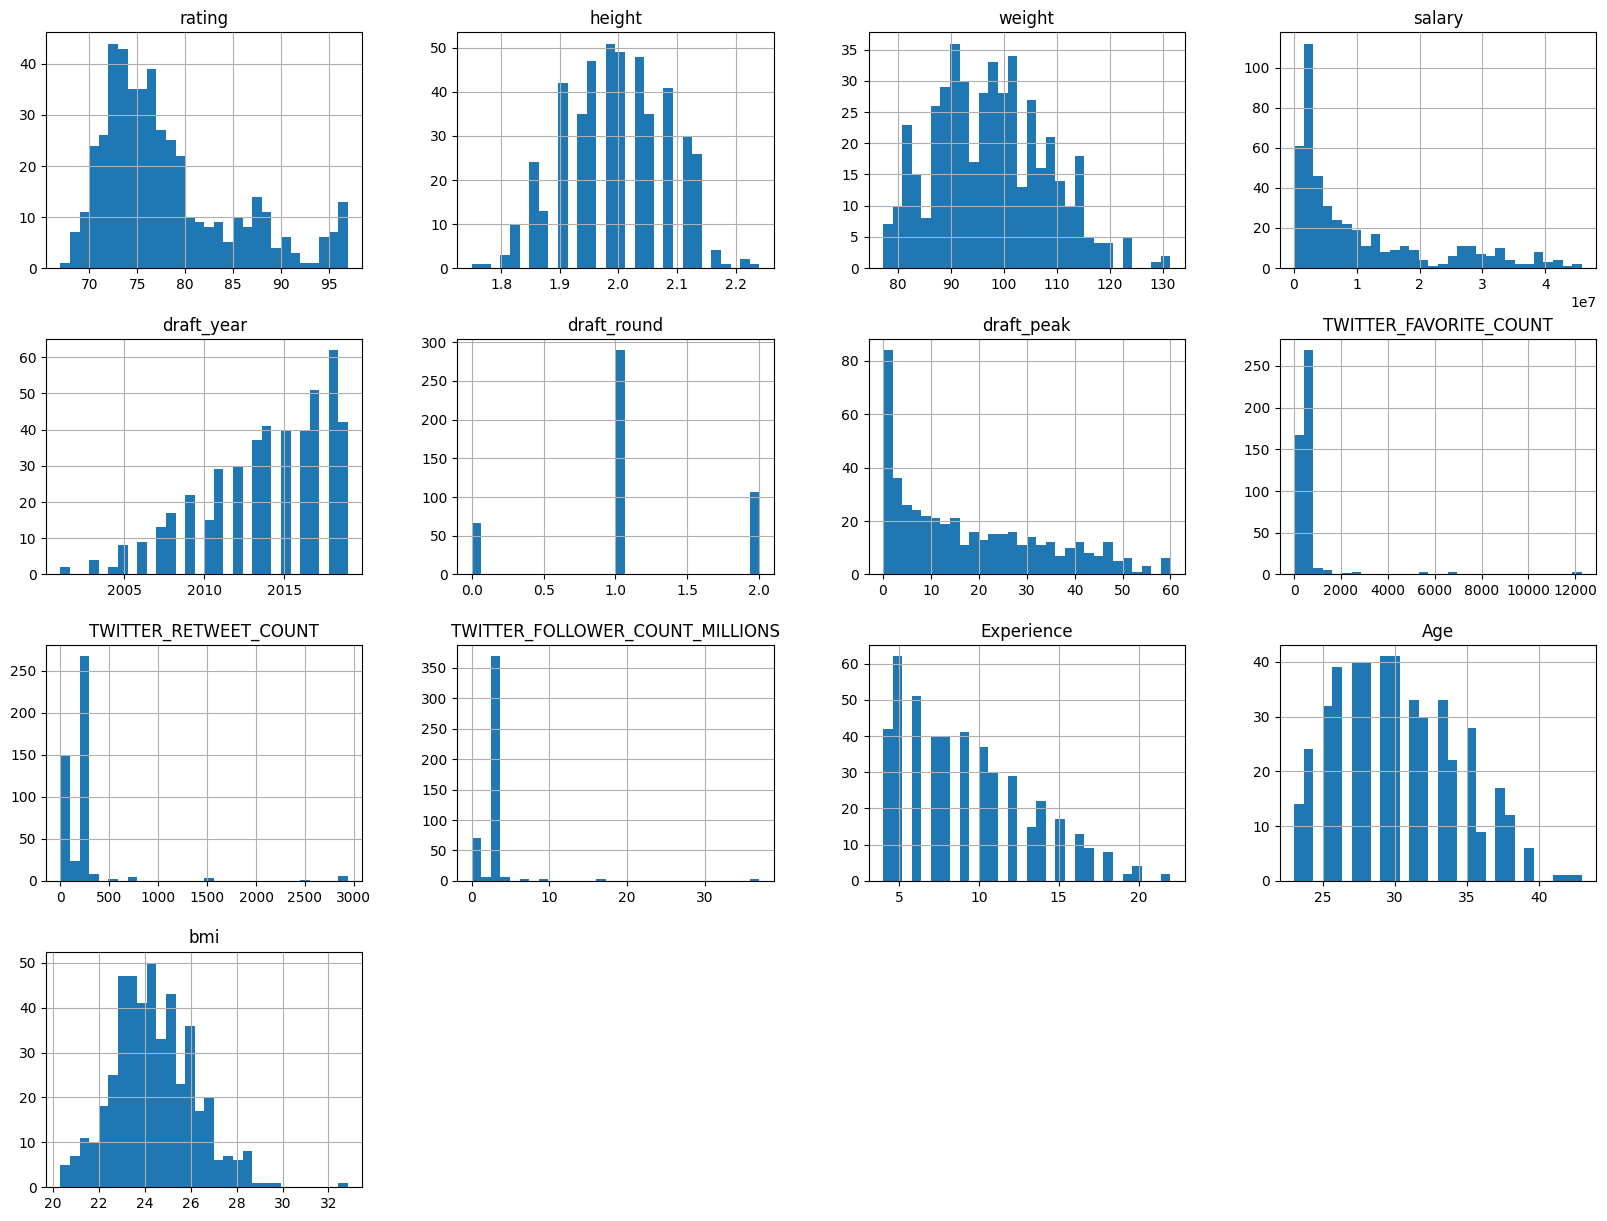

In [24]:
df1_copy.hist(bins=30,figsize=(20,15))
plt.show()

In [25]:
# Finding the useful features to predict the salary
corre = df1_copy.corr()
corre['salary'].sort_values(ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1176\377444670.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corre = df1_copy.corr()


salary                             1.000000
rating                             0.830215
Experience                         0.534186
Age                                0.438696
TWITTER_FAVORITE_COUNT             0.338983
TWITTER_RETWEET_COUNT              0.300084
TWITTER_FOLLOWER_COUNT_MILLIONS    0.197511
weight                             0.070787
height                             0.055172
bmi                                0.033195
draft_round                        0.002158
draft_peak                        -0.214813
draft_year                        -0.534186
Name: salary, dtype: float64

In [26]:
# Players who are not in the team, assigning the value to No team
df1_copy.fillna('no team',inplace=True)

In [27]:
df1_copy['position'].value_counts()

# Creating a new column for Team salary by using grouping team and salary columns

salary = df1_copy[['salary', 'team']]
new_sal = salary.groupby('team').mean().reset_index()
boundaries = [np.NINF, 7E+6, 7.6E+6, 8.1E+6, 9E+6, 9.5E+6, np.Inf]
labels = [1,2,3,4,5,6]
new_sal['team_salary'] = pd.cut(salary.groupby('team').mean().\
                                reset_index()['salary'], bins=boundaries,labels=labels)
new_sal.drop(['salary'], axis = 1, inplace = True)
#merging this categories to data
df1_copy = df1_copy.merge(new_sal, on = 'team', how = 'left')

In [28]:
# Grouping the players by using Country , this will help how many players are from outside USA
# Changing the values of the country field which is outside of USA , since only 25% players are from Outside USA, so we are going 
# to have only two categories
df1_copy.loc[df1_copy['country'] != 'USA','country'] = 'not USA'

In [29]:
df1.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,TWITTER_FOLLOWER_COUNT_MILLIONS
0,Aaron Gordon,81,#0,Orlando Magic,F,9/16/1995,6-8 / 2.03,220 lbs. / 99.8 kg.,19863636,USA,2014,1,4,42.500000,16.000000,2.850071
1,Aaron Holiday,73,#3,Indiana Pacers,G,9/30/1996,6-0 / 1.83,185 lbs. / 83.9 kg.,2239200,USA,2018,1,23,583.257282,198.997573,2.850071
2,Abdel Nader,70,#11,Oklahoma City Thunder,F,9/25/1993,6-5 / 1.96,225 lbs. / 102.1 kg.,1618520,Egypt,2016,2,58,583.257282,198.997573,2.850071
3,Admiral Schofield,71,#1,Washington Wizards,F,3/30/1997,6-5 / 1.96,241 lbs. / 109.3 kg.,1000000,USA,2019,2,42,583.257282,198.997573,2.850071
4,Al Horford,85,#42,Philadelphia 76ers,C-F,6/3/1986,6-9 / 2.06,246 lbs. / 111.6 kg.,28000000,Dominican Republic,2007,1,3,136.000000,71.000000,0.253000


In [30]:
df1_copy.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,TWITTER_FOLLOWER_COUNT_MILLIONS,Experience,Age,bmi,team_salary
0,Aaron Gordon,81,#0,Orlando Magic,F,9/16/1995,2.03,99.8,19863636,USA,2014,1,4,42.500000,16.000000,2.850071,9.0,28.0,24.218011,4
1,Aaron Holiday,73,#3,Indiana Pacers,G,9/30/1996,1.83,83.9,2239200,USA,2018,1,23,583.257282,198.997573,2.850071,5.0,27.0,25.053002,2
2,Abdel Nader,70,#11,Oklahoma City Thunder,F,9/25/1993,1.96,102.1,1618520,not USA,2016,2,58,583.257282,198.997573,2.850071,7.0,30.0,26.577468,6
3,Admiral Schofield,71,#1,Washington Wizards,F,3/30/1997,1.96,109.3,1000000,USA,2019,2,42,583.257282,198.997573,2.850071,4.0,26.0,28.451687,6
4,Al Horford,85,#42,Philadelphia 76ers,C-F,6/3/1986,2.06,111.6,28000000,not USA,2007,1,3,136.000000,71.000000,0.253000,16.0,37.0,26.298426,6


In [31]:
##Dropping non-useful features
drop_features = ['full_name','jersey','team','b_day']
df1_copy = df1_copy.drop(drop_features,axis=1)

In [32]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 463
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   rating                           464 non-null    int64   
 1   position                         464 non-null    object  
 2   height                           464 non-null    float64 
 3   weight                           464 non-null    float64 
 4   salary                           464 non-null    int64   
 5   country                          464 non-null    object  
 6   draft_year                       464 non-null    int64   
 7   draft_round                      464 non-null    int32   
 8   draft_peak                       464 non-null    int32   
 9   TWITTER_FAVORITE_COUNT           464 non-null    float64 
 10  TWITTER_RETWEET_COUNT            464 non-null    float64 
 11  TWITTER_FOLLOWER_COUNT_MILLIONS  464 non-null    float64 
 12  Experien

In [33]:
## Two variables are created x for features and y for target variables
#X = nba_full_data_copy.drop(['salary'],axis=1)
#y = nba_full_data_copy['salary']

In [34]:
# preprocess categorical data into numerical (Position,Country)

In [35]:
# Select the columns to be transformed
categorical_cols = ['position','country']
df_categorical = df1_copy[categorical_cols]

# Perform one-hot encoding on the selected columns
df_encoded = pd.get_dummies(df_categorical)

# Concatenate the one-hot encoded columns with the rest of the DataFrame
df1_copy = pd.concat([df1_copy, df_encoded], axis=1)

# Drop the original categorical columns
df1_copy = df1_copy.drop(categorical_cols, axis=1)


In [36]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 463
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   rating                           464 non-null    int64   
 1   height                           464 non-null    float64 
 2   weight                           464 non-null    float64 
 3   salary                           464 non-null    int64   
 4   draft_year                       464 non-null    int64   
 5   draft_round                      464 non-null    int32   
 6   draft_peak                       464 non-null    int32   
 7   TWITTER_FAVORITE_COUNT           464 non-null    float64 
 8   TWITTER_RETWEET_COUNT            464 non-null    float64 
 9   TWITTER_FOLLOWER_COUNT_MILLIONS  464 non-null    float64 
 10  Experience                       464 non-null    float64 
 11  Age                              464 non-null    float64 
 12  bmi     

In [37]:
df1_copy.head()

,rating,height,weight,salary,draft_year,draft_round,draft_peak,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,TWITTER_FOLLOWER_COUNT_MILLIONS,...,team_salary,position_C,position_C-F,position_F,position_F-C,position_F-G,position_G,position_G-F,country_USA,country_not USA
0,81,2.03,99.8,19863636,2014,1,4,42.500000,16.000000,2.850071,...,4,0,0,1,0,0,0,0,1,0
1,73,1.83,83.9,2239200,2018,1,23,583.257282,198.997573,2.850071,...,2,0,0,0,0,0,1,0,1,0
2,70,1.96,102.1,1618520,2016,2,58,583.257282,198.997573,2.850071,...,6,0,0,1,0,0,0,0,0,1
3,71,1.96,109.3,1000000,2019,2,42,583.257282,198.997573,2.850071,...,6,0,0,1,0,0,0,0,1,0
4,85,2.06,111.6,28000000,2007,1,3,136.000000,71.000000,0.253000,...,6,0,1,0,0,0,0,0,0,1


In [38]:
## use MinMaxScaler to normalize the data in salary column to value in range(0-1),increase ML model training time and accurecy

In [39]:
# Initialize the Scaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the salary column
df1_copy['salary'] = scaler.fit_transform(df1_copy[['salary']])

In [40]:
df1_copy.head()

,rating,height,weight,salary,draft_year,draft_round,draft_peak,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,TWITTER_FOLLOWER_COUNT_MILLIONS,...,team_salary,position_C,position_C-F,position_F,position_F-C,position_F-G,position_G,position_G-F,country_USA,country_not USA
0,81,2.03,99.8,0.433265,2014,1,4,42.500000,16.000000,2.850071,...,4,0,0,1,0,0,0,0,1,0
1,73,1.83,83.9,0.047871,2018,1,23,583.257282,198.997573,2.850071,...,2,0,0,0,0,0,1,0,1,0
2,70,1.96,102.1,0.034299,2016,2,58,583.257282,198.997573,2.850071,...,6,0,0,1,0,0,0,0,0,1
3,71,1.96,109.3,0.020774,2019,2,42,583.257282,198.997573,2.850071,...,6,0,0,1,0,0,0,0,1,0
4,85,2.06,111.6,0.611183,2007,1,3,136.000000,71.000000,0.253000,...,6,0,1,0,0,0,0,0,0,1


In [41]:
#split data into training and testing (data is usually divided in to x,y as features and target variables, random_state is 0 so every time code runs same split happens)

In [42]:
X = df1_copy.drop('salary', axis=1)
y = df1_copy['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
# Show the first 5 rows of the training set
print("Training set:")
X_train.head()
y_train.head()

# Show the first 5 rows of the testing set
print("Testing set:")
X_test.head()
y_test.head()

Training set:
     rating  height  weight  draft_year  draft_round  draft_peak  \
135      78    1.91    97.5        2008            1           7   
391      72    1.91    88.5        2016            0           0   
254      72    1.98    95.3        2018            0           0   
284      76    1.93    81.6        2018            1          26   
420      69    1.96    99.8        2018            0           0   

     TWITTER_FAVORITE_COUNT  TWITTER_RETWEET_COUNT  \
135               55.000000              26.000000   
391              583.257282             198.997573   
254              583.257282             198.997573   
284              583.257282             198.997573   
420              583.257282             198.997573   

     TWITTER_FOLLOWER_COUNT_MILLIONS  Experience  ...  team_salary  \
135                         2.850071        15.0  ...            6   
391                         2.850071         7.0  ...            2   
254                         2.850071      

In [44]:
#exporting to csv file optional
df1_copy.to_csv("ML_Model_Dataset_01/complete_data_model.csv", index=False)
X_train.to_csv("ML_Model_Dataset_01/X_train.csv", index=False)
X_test.to_csv("ML_Model_Dataset_01/X_test.csv", index=False)
y_train.to_csv("ML_Model_Dataset_01/y_train.csv", index=False)
y_test.to_csv("ML_Model_Dataset_01/y_test.csv", index=False)